# Plotiing NN Fuction on the input domain

In [1]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib widget

In [2]:
@dataclass
class ActFunc:
    func_str: str = None
    c = 0
    b = 1
    bigger_than = 0
    if_bigger = 1
    if_smaller = 0
    
    def sigmoid(self, y: np.ndarray) -> np.ndarray:
        self.func_str = 'sigmoid'
        return 1/(1 + np.exp(-y))

    def hard_limit(self, y: np.ndarray) -> np.ndarray:
        self.func_str = 'hard_limit'
        return np.where(y >= self.bigger_than, self.if_bigger, self.if_smaller)

    def radial_basis(self, y: np.ndarray) -> np.ndarray:
        self.func_str = f'radial_basis_c-{self.c}_b-{self.b}'
        return np.exp((-(y-self.c)**2) * self.b)


def y (x1: np.ndarray, x2:np.ndarray, sigma:object) -> np.ndarray:
    """Single Perceptron
    - Input = 2
    - Output = 1
    """
    return sigma(-4.79 * x1 + 5.9 * x2 - 0.93)

def mlp (x1: np.ndarray, x2:np.ndarray, sigma:object) -> np.ndarray:
    """Two Layer NN
    - Input = 2
    - Hidden layer has 2 perceptrons
    - Output = 1
    - No activation function on output
    """

    x = np.array([x1, x2])
    vt = np.array([[-2.69, -2.8],
                   [-3.39, -4.56]])
    bv = np.array([-2.21, 4.76]).reshape(2, 1)  # we reshaped to make it broadcastable
    w = np.array([-4.91, 4.95])
    bw = -2.28
    # first layer output
    z = sigma(np.dot(vt, x) + bv)
    # second layer output
    z = np.dot(w, z) + bw
    return z

activation_func = ActFunc()


# Plotting One Perceptron

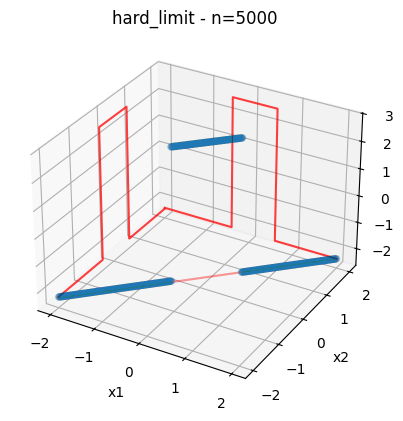

In [25]:
##### init variables
# number of points
n = 5000
sigma = activation_func.hard_limit  # sigmoid | hard_limit | radial_basis

# generate some random points
x1 = np.linspace(-2, 2, n)
x2 = np.linspace(-2, 2, n)

z = mlp(x1, x2, sigma)


# plot the points in 3D
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter(x1, x2, z,
           alpha=0.02
           )

ax.plot(x1, z, zdir='y', zs=2, c='red', alpha=0.75)
ax.plot(x2, z, zdir='x', zs=-2, c='red', alpha=0.75)
ax.plot(x1, x2, zdir='z', zs=z.min().round(2), c='red', alpha=0.4)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f'{activation_func.func_str} - {n=}')

# # saving the plot
plt.savefig(f'{activation_func.func_str}-{n}.svg', dpi=300)
plt.savefig(f'{activation_func.func_str}-{n}.png', dpi=300)

plt.show()